# Titanic Survival Data Analysis 
### *Author: Huong (Ivy) Nguyen*

### Introduction

On April 15, 1912, the RMS Titanic was sunk after colliding with an iceberg. This shipwreck accident led to the deaths of 1502 out of 2224 passengers and crew at that time. One of the main reasons why the shipwreck led to such loss of life was that there were not enough lifeboats for everyone on the ship. The question remained till today is whether or not there were other factors which could potentially influence the survival rate of some groups versus the others besides luck. With the provided dataset for the RMS Ttitanic accident (titanic-data.csv), a full analysis can be completed to investigate these potential factors further using different visualization and data exploration techniques such as matplotlib, pandas, seaborn and numpy. 

This will be my very first data analysis on a full dataset. I will start the analysis by
importing all the necessary packages including pandas, numpy, matplotlib and csv. Since I also want to generate plots for visualization and communication purposes within my report, I have chosen to include the magic keyword %matplotlib inline within my code. Moreover, in order to help me debug any errors easier (at least in my opinion), I have also turned on the 'pbd' mode. First of all, I want to take a careful look at the data, try to understand each invidual variable (column), and then propose my questions that I am interested in investigating. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline
%pdb

#Import the csv file by using pandas read_csv function
data = pd.read_csv('titanic-data.csv')

Automatic pdb calling has been turned ON


### Questions - Data Wrangling - Data Exploration

In [2]:
#View the first 5 rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#View the last 5 rows of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Here are the description/definition of all variables for this dataset:

- **Survived:** Outcome of survival (0 = No; 1 = Yes)
- **Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name:** Name of passenger
- **Sex:** Sex of the passenger
- **Age:** Age of the passenger (Some entries contain NaN)
- **SibSp:** Number of siblings and spouses of the passenger aboard
- **Parch:** Number of parents and children of the passenger aboard
- **Ticket:** Ticket number of the passenger
- **Fare:** Fare paid by the passenger
- **Cabin:** Cabin number of the passenger (Some entries contain NaN)
- **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

After looking through the data of the RMS Titanic accident, I thought of the two following questions in mind: 

**Question 1:** Is there any correlation between the survival rate and pclass? For example, if the passenger was classified as class '1', does that mean he/she would have a higher chance to survive? 

**Question 2:** Moreover, is there any relationship between sex, age, socio-economic class and survival rate? For example, female with the age of 18 or less were more likely to survive than male for every class? 

In order to answer these two questions, I firstly have to remove all the other unnecessary information as well as missing data points out of the dataframe. 

In [4]:
#Check the data type of all variables
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Count number of rows and columns that the data has
nrow = data.shape[0]
ncol = data.shape[1]

print('Number of rows is:', nrow, 'and the number of columns is:', ncol)

Number of rows is: 891 and the number of columns is: 12


In [6]:
#Remove all missing data points
new_data = data.dropna()

new_nrow = new_data.shape[0]
new_ncol = new_data.shape[1]
print('Number of new rows is:', new_nrow, 'and the number of new columns is:', new_ncol)

Number of new rows is: 183 and the number of new columns is: 12


After removing all the rows that have missing information, I realized that I just deleted almost all the data (from 891 rows to 183 rows), which is not exactly what I want to do for my data analysis. So I went back and took a closer look at the original data to determin which column has the most missing values. It might be a better idea to exclude the column with the most missing values first before removing any rows with missing data. 

In [7]:
#Obtain a concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


According the result that I obtained, the column 'Cabin' has the most missing values (891 - 204 = 687). Therefore, it would be best if I exclude that column first before removing all the other rows with missing values. 

In [8]:
data = data[[i for i in list(data.columns) if i != 'Cabin']]
data = data.dropna()
new_row = data.shape[0]
new_col = data.shape[1]

print('Number of rows is:', new_row, 'and the number of columns is:', new_col)

Number of rows is: 712 and the number of columns is: 11


In [9]:
#obtain a stastical summary for all variables of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In order to answer Question 1, I first separate the data into three different categories:
- Data only involves Pclass = 1
- Data only involves Pclass =  2
- And data only involves Pclass = 3

After separating the data, I calculate the sum of the survival column for each Pclass and then normalize each sum by diving each by the total sum of all survival rate regardless what Pclass the passengers are. Finally, I demonstrate which Pclass would have the highest survival rate, I have created a pie chart named 'Survival Distribution for All Pclass'. 

In [10]:
pclass3 = data[data['Pclass']==3]
pclass2 = data[data['Pclass']==2]
pclass1 = data[data['Pclass']==1]

p1_total_survival = sum(pclass1['Survived'])
p2_total_survival = sum(pclass2['Survived'])
p3_total_survival = sum(pclass3['Survived'])

sum_survival = data['Survived'].sum()
p1_survival = p1_total_survival/sum_survival
p2_survival = p2_total_survival/sum_survival
p3_survival = p3_total_survival/sum_survival

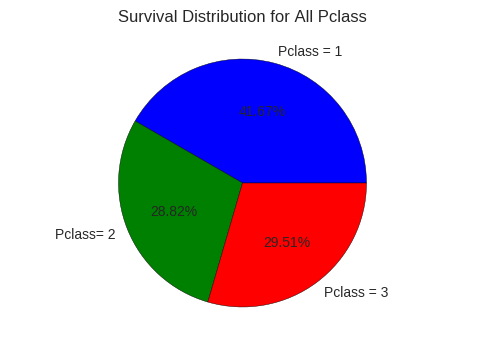

In [11]:
x_list = pd.Series([p1_survival, p2_survival, p3_survival])
labels = ['Pclass = 1', 'Pclass= 2', 'Pclass = 3']
plt.axis("equal") 
plt.pie(x_list,labels=labels,autopct="%1.2f%%") 
plt.title("Survival Distribution for All Pclass")
plt.show()

According to the pie chart, it appears that passengers wth Pclass=1 had a higher chance to survive than the others. Therefore, there is a potential correlation between the socio_economic class and survival rate of the whipwreck. From here, a follow-up question can be proposed.  
**Question 1a**: If the passengers were female and pclass=1, was there a better chance for them to survive?
<br/>To proceed with this follow-up question, I decide to make a barplot that shows the survival rate difference between female and male for different classes.  

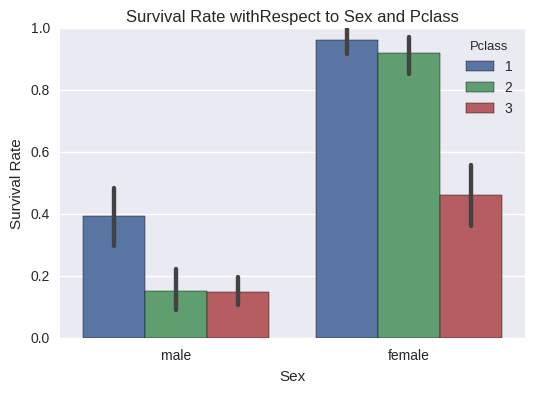

In [12]:
#Survival rate of different classes between female and male using seaborn
sub_data = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=data);
sns.plt.title('Survival Rate withRespect to Sex and Pclass')
sub_data.set(ylabel='Survival Rate')

According to the bar plot generated above, there is a huge difference in the survival rate between male and female not only in pclass=1 but also for the other classes. Thereofore, it is more than likely that if a passenger was an upper-class female, she would have a higher chance to survive through the shipwreck.  

In order to complete question 2, I will have to clean up the original data even more by including only columns that are necessary. First, I need to construct an age distribution histogram in order to determine which age is the most appropriate choice to split the dataset. Then, I will have to filter out all the passengers with that age mark. Then, I will need to compare the survival rate from these two sub-dataset between female and male. 

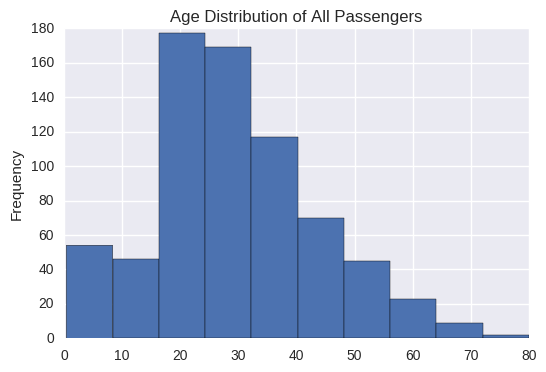

In [13]:
#Create a histogram for age distribution
data['Age'].plot.hist(bins=10)
plt.title('Age Distribution of All Passengers')
plt.show()

According to the above histogram, it seems appropriate to choose age=18 to be the mark. 

In [14]:
#Filter out the data based on category and criteria

female_18orless = data[(data['Age'] <= 18) & (data['Sex'] == 'female')] #data includes female with the age of 18 or less only
female_above18 = data[(data['Age'] > 18) & (data['Sex'] == 'female')] #data includes female who are older than 18 only
male_18orless = data[(data['Age'] <= 18) & (data['Sex'] == 'male')] #data includes male with the age of 18 or less only
male_above18 = data[(data['Age'] > 18) & (data['Sex'] == 'male')] #data includes male who are older than 18 only

survival_female_18orless = (female_18orless['Survived'].sum())/sum_survival
survival_female_above18 = (female_above18['Survived'].sum())/sum_survival
survival_male_18orless = (male_18orless['Survived'].sum())/sum_survival
survival_male_above18 = (male_above18['Survived'].sum())/sum_survival

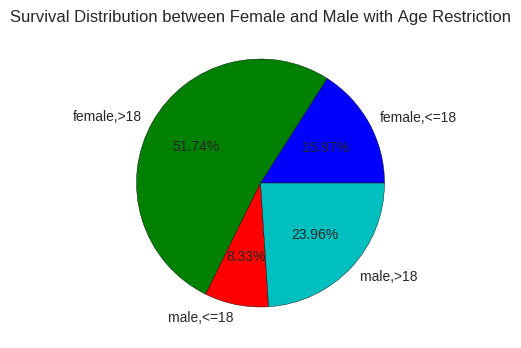

In [15]:
#Generate pie plot for the above sub-data for each category
survival_list = pd.Series([survival_female_18orless, survival_female_above18, survival_male_18orless,survival_male_above18])
labels = ['female,<=18','female,>18', 'male,<=18','male,>18']
plt.axis("equal") 
plt.pie(survival_list,labels=labels,autopct="%1.2f%%") 
plt.title("Survival Distribution between Female and Male with Age Restriction")
plt.show()

This pie chart is a bit shocking for me since my prediction was: if a passenger was a female and 18 or younger, then she would have a higher chance to survive through the shipwreck. However, the result is completely opposite to what I thought it would be. I am suspicious the socio-economic class plays a key role in influencing this result. In order to answer my own dilemma, I decide to count the number of survived passengers for each class for each of the categories described above. 

In [16]:
def count_class(data):
    count1 = len(data[(data['Pclass']==1) &(data['Survived']==1)]) #count number of survivers with pclass=1
    count2 = len(data[(data['Pclass']==2) &(data['Survived']==1)]) #count number of survivers with pclass=2
    count3 = len(data[(data['Pclass']==3) &(data['Survived']==1)]) #count number of survivers with pclass=3
    return [count1, count2, count3]

count_female_18orless = count_class(female_18orless)
count_female_above18 = count_class(female_above18)
count_male_18orless = count_class(male_18orless)
count_male_above18 = count_class(male_above18)

In [21]:
#Make a dataframe for visulizing the number of survived passengers for different class from different category
count_class = pd.DataFrame({'female_18orless': count_female_18orless, 
                            'female_above18': count_female_above18, 
                            'male_18orless': count_male_18orless, 
                            'male_above18': count_male_above18}, index=['PClass=1', 'PClass=2','PClass=3'])

In [18]:
count_class

,female_18orless,female_above18,male_18orless,male_above18
PClass=1,10,70,4,36
PClass=2,14,54,9,6
PClass=3,22,25,11,27


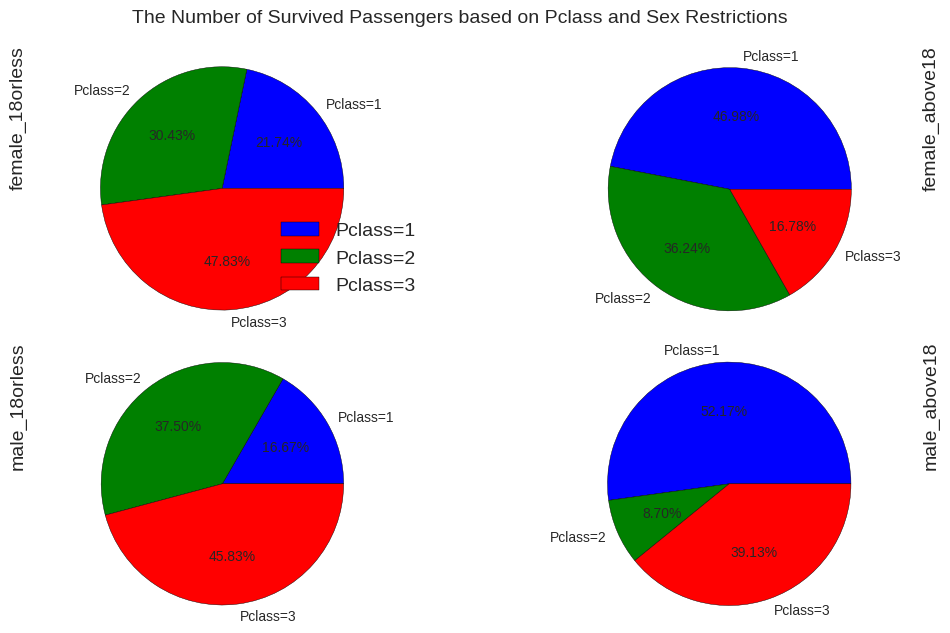

In [25]:
#Generate pie charts to show the difference among different socio-economic classes for the number of survived 
#passengers in term of percentage

fig = plt.figure(figsize=(12,7))
labels = ['Pclass=1','Pclass=2', 'Pclass=3']

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


ax1.pie('female_18orless',labels=labels, autopct="%1.2f%%", data=count_class) 
ax1.axis("equal")
ax1.set_title('female_18orless', rotation=90, loc='left', fontsize=14)
ax1.legend(loc='lower right', fontsize=14)

ax2.pie('female_above18', labels=labels, autopct="%1.2f%%",data=count_class) 
ax2.axis("equal")
ax2.set_title('female_above18', rotation=90, loc='right',fontsize=14)

ax3.pie('male_18orless', labels=labels, autopct="%1.2f%%", data=count_class) 
ax3.axis("equal")
ax3.set_title('male_18orless', rotation=90, loc='left',fontsize=14)

ax4.pie('male_above18', labels=labels, autopct="%1.2f%%",data=count_class) 
ax4.axis("equal")
ax4.set_title('male_above18', rotation=90, loc='right',fontsize=14)

fig.suptitle('The Number of Survived Passengers based on Pclass and Sex Restrictions',fontsize=14)
plt.show()


According to the above generated pie charts and the obtained dataframe, a large number of survived female and male passengers that are 18 or above were upper-class (pclass=1). This potentially implies that the socio-economic status played a bigger role in influencing the survival rate of all passengers than age and sex did during the Titanic shipwreck. 

### Conclusion
Based on analysis of the dataset obtained from the Titanic shipwreck, it appears that the socio-economic status play an essential role in influencing the survival rate for the passengers on this ship rather than age or sex. Specifically, passengers who are females with upper-class status potentially had  a higher chance to survive than the other passengers. A further look at the correlation between the survival rate and other variables such as the embarked port or the ticket price could lead to other interesting factors that could play a key role in affecting the survival rate as well. 

The provided dataset has multiple rows that contain missing values, which could potentially affect the final results obtained in this report. Specifically, the 'Cabin' column was filled with missing values and was dropped during the data analysis. However, in my opinion, this column should not change much of the results presented here since it was not used specifically for this analysis. Instead, all the other rows (after removing the 'Cabin' column) with missing values were also dropped out of the original dataset. These rows could potentially carry important information about passengers with different class, sex, and age that need to be further investigated. One way to fix this problem is to fill missing values by mean of non-missing values. This is an easy technique to be implemented though it could reduce the variability of the dataset itself. 

Due to the fact that this dataset only contains the information of 891 passengers out of 2224 passengers and crew that were on the Titanic ship on April 15, 1912, the results presented here could potentially carry biases. Thus, it is strongly recommended that all readers should not generalize the factors that influence the survival results from this dataset for the full dataset. Moreover, since the population parameters are not known, a full statistical data analysis using a two-tail (for non-directional hypothesis) or one-tail (for directional hypothesis) t-test between different variables could be conducted to further investigate this sample data. If a full dataset of this event is available, a comparison between the results obtained from the t test and those from the full dataset should be done. 